In [1]:
from explann.doe import FullFactorial, CentralCompositeDesign, LatinHypercubeSampling

variables = {
    't': [0.001, 0.010],                #Thickness
    'c': [-0.01255805, 0.0],            #cp
    'T': [400.0, 650.0],                #T0in
    'p': [4.0e5, 1.0e6],                #p0in
    'T_e': [290.0, 400.0],               #outerTemperature
}


ccd = CentralCompositeDesign(
    variables=variables,
    center=(1,0),
    alpha='r',
    face='ccc',
)
ccd.doe

,t,c,T,p,T_e
Index,,,,,
1,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
2,1.000000,-1.000000,-1.000000,-1.000000,-1.000000
3,-1.000000,1.000000,-1.000000,-1.000000,-1.000000
4,1.000000,1.000000,-1.000000,-1.000000,-1.000000
5,-1.000000,-1.000000,1.000000,-1.000000,-1.000000
6,1.000000,-1.000000,1.000000,-1.000000,-1.000000
7,-1.000000,1.000000,1.000000,-1.000000,-1.000000
8,1.000000,1.000000,1.000000,-1.000000,-1.000000
9,-1.000000,-1.000000,-1.000000,1.000000,-1.000000


In [2]:
ffd = FullFactorial(
    variables=variables,
    level_codes=[-1,1]
)

In [3]:
import h5py

hff = h5py.File('/home/ppiper/Dropbox/local/github/explann/data/experimental_planning_T0in_limit_clear/hf.h5', 'r')

In [4]:
hff.keys()

<KeysViewHDF5 ['CP3_y', 'Heat_Flux_UPPER_WALL', 'Mach', 'Pressure', 'T0in', 'Temperature', 'Temperature_Solid', 'Temperature_Solid_INNERWALL', 'Thickness', 'outerTemperature', 'p0in']>

In [5]:
import sys
sys.path.append('/home/ppiper/Dropbox/local/github/frog')

from frog.rom import SVD

svd = SVD(hff['Temperature'][:].T)
svd.SVD(rank=5)

svd.acumEnergy()

99.93435148213747

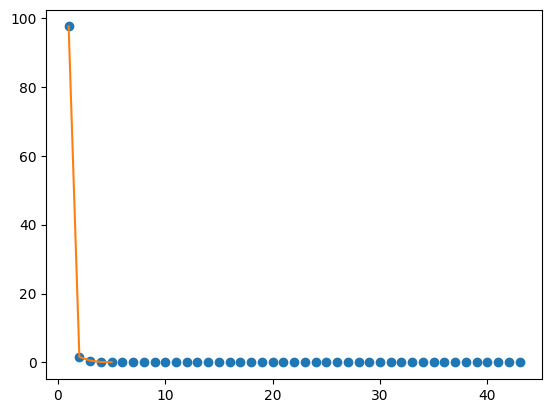

In [6]:
svd.plotEnergy()

In [7]:
ccd.doe.shape

(43, 5)

In [11]:
svd.L.shape

(43, 5)

In [12]:
ccd = CentralCompositeDesign(
    variables=variables,
    center=(1,0),
    alpha='r',
    face='ccc',
)

ccd.append_results({f'L{i}': svd.L[:,i] for i in range(svd.L.shape[1])})
ccd.doe

,t,c,T,p,T_e,L0,L1,L2,L3,L4
Index,,,,,,,,,,
1,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-104438.361443,779.876612,600.738936,22.708474,-177.651699
2,1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-105050.197012,1897.277643,602.479352,171.811274,-58.509609
3,-1.000000,1.000000,-1.000000,-1.000000,-1.000000,-105040.687608,960.184532,-573.906133,13.426814,-157.221717
4,1.000000,1.000000,-1.000000,-1.000000,-1.000000,-105658.936656,2096.507718,-567.528655,157.102339,-57.452553
5,-1.000000,-1.000000,1.000000,-1.000000,-1.000000,-125367.242871,-3179.916657,651.971935,44.213844,-123.970444
6,1.000000,-1.000000,1.000000,-1.000000,-1.000000,-126355.844810,-1394.739716,642.123698,304.800671,68.883572
7,-1.000000,1.000000,1.000000,-1.000000,-1.000000,-126158.402286,-2883.676820,-788.203458,1.227046,-103.107558
8,1.000000,1.000000,1.000000,-1.000000,-1.000000,-127157.739052,-1068.884445,-790.576539,253.138478,56.381992
9,-1.000000,-1.000000,-1.000000,1.000000,-1.000000,-104806.063376,1428.924661,662.788425,-206.263818,-56.785316


In [13]:
from explann.models import FactorialModel

ffm = FactorialModel(
    data = ccd.doe,
    functions = {
        'L0': 'L0 ~ t*c*T*p*T_e + np.power(t,2) + np.power(c,2) + np.power(T,2) + np.power(p,2) + np.power(T_e,2) + np.power(t,2)*np.power(c,2) + np.power(t,2)*np.power(T,2) + np.power(t,2)*np.power(p,2) + np.power(t,2)*np.power(T_e,2) + np.power(c,2)*np.power(T,2) + np.power(c,2)*np.power(p,2) + np.power(c,2)*np.power(T_e,2) + np.power(T,2)*np.power(p,2) + np.power(T,2)*np.power(T_e,2) + np.power(p,2)*np.power(T_e,2)',
        'L1': 'L1 ~ t*c*T*p*T_e + np.power(t,2) + np.power(c,2) + np.power(T,2) + np.power(p,2) + np.power(T_e,2) + np.power(t,2)*np.power(c,2) + np.power(t,2)*np.power(T,2) + np.power(t,2)*np.power(p,2) + np.power(t,2)*np.power(T_e,2) + np.power(c,2)*np.power(T,2) + np.power(c,2)*np.power(p,2) + np.power(c,2)*np.power(T_e,2) + np.power(T,2)*np.power(p,2) + np.power(T,2)*np.power(T_e,2) + np.power(p,2)*np.power(T_e,2)',
        'L2': 'L2 ~ t*c*T*p*T_e + np.power(t,2) + np.power(c,2) + np.power(T,2) + np.power(p,2) + np.power(T_e,2) + np.power(t,2)*np.power(c,2) + np.power(t,2)*np.power(T,2) + np.power(t,2)*np.power(p,2) + np.power(t,2)*np.power(T_e,2) + np.power(c,2)*np.power(T,2) + np.power(c,2)*np.power(p,2) + np.power(c,2)*np.power(T_e,2) + np.power(T,2)*np.power(p,2) + np.power(T,2)*np.power(T_e,2) + np.power(p,2)*np.power(T_e,2)',
        'L3': 'L3 ~ t*c*T*p*T_e + np.power(t,2) + np.power(c,2) + np.power(T,2) + np.power(p,2) + np.power(T_e,2) + np.power(t,2)*np.power(c,2) + np.power(t,2)*np.power(T,2) + np.power(t,2)*np.power(p,2) + np.power(t,2)*np.power(T_e,2) + np.power(c,2)*np.power(T,2) + np.power(c,2)*np.power(p,2) + np.power(c,2)*np.power(T_e,2) + np.power(T,2)*np.power(p,2) + np.power(T,2)*np.power(T_e,2) + np.power(p,2)*np.power(T_e,2)',
        'L4': 'L4 ~ t*c*T*p*T_e + np.power(t,2) + np.power(c,2) + np.power(T,2) + np.power(p,2) + np.power(T_e,2) + np.power(t,2)*np.power(c,2) + np.power(t,2)*np.power(T,2) + np.power(t,2)*np.power(p,2) + np.power(t,2)*np.power(T_e,2) + np.power(c,2)*np.power(T,2) + np.power(c,2)*np.power(p,2) + np.power(c,2)*np.power(T_e,2) + np.power(T,2)*np.power(p,2) + np.power(T,2)*np.power(T_e,2) + np.power(p,2)*np.power(T_e,2)', 
    }
)

In [14]:
sig_ffm= ffm.build_significant_models()
sig_ffm.summary()

{'L0': <class 'statsmodels.iolib.summary.Summary'>
 """
                             OLS Regression Results                            
 Dep. Variable:                     L0   R-squared:                       1.000
 Model:                            OLS   Adj. R-squared:                  1.000
 Method:                 Least Squares   F-statistic:                 5.761e+05
 Date:                Tue, 15 Aug 2023   Prob (F-statistic):           3.98e-81
 Time:                        18:30:35   Log-Likelihood:                -199.98
 No. Observations:                  43   AIC:                             422.0
 Df Residuals:                      32   BIC:                             441.3
 Df Model:                          10                                         
 Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
 -----------------------------------------------------------

In [15]:
ffm.get_significant_model_functions()

{'L0': 'L0 ~ 1 + t + c + T + t:T + c:T + p + t:p + T:p + np.power(t, 2) + np.power(p, 2)',
 'L1': 'L1 ~ 1 + t + c + T + t:T + p + t:p + T:p + np.power(t, 2)',
 'L2': 'L2 ~ c + T + t:T + c:T + p + t:p + T:p + np.power(c, 2) + np.power(p, 2)',
 'L3': 'L3 ~ t + c + T + t:T + c:T + p + c:p + T:p + np.power(t, 2) + np.power(p, 2)',
 'L4': 'L4 ~ t + T + t:T + p + T:p + np.power(t, 2)'}

In [30]:
ffm = FactorialModel(
    data = ccd.doe,
    functions = {
        'L0': 'L0 ~ 1 + t + c + T + t:T + c:T + p + t:p + T:p + np.power(t, 2) + np.power(p, 2)',
        'L1': 'L1 ~ 1 + t + c + T + t:T + c:T + p + t:p + T:p + np.power(t, 2) + np.power(p, 2)',
        'L2': 'L2 ~ 1 + t + c + T + t:T + c:T + p + t:p + T:p + np.power(t, 2) + np.power(p, 2)',
        'L3': 'L3 ~ 1 + t + c + T + t:T + c:T + p + t:p + T:p + np.power(t, 2) + np.power(p, 2)',
        'L4': 'L4 ~ 1 + t + c + T + t:T + c:T + p + t:p + T:p + np.power(t, 2) + np.power(p, 2)', 
    },
    levels = ccd.levels,
)

In [31]:
import numpy as np

# equivalent to the case 10 of lhs
independent_vars = {
        't': 0.006044329228014826,
        'c': -0.001277584765410799,
        'T': 616.0,
        'p': 456429.13834591914,
        #'T_e': 318.0
    }

independent_vars_coded = {}
for var, value in independent_vars.items():
    independent_vars_coded[var] = np.interp(value,  ccd.levels[f'{var}'].values, ccd.levels.index.values)
print(independent_vars_coded)

L_predicted = []
for dependent in ['L0', 'L1', 'L2', 'L3', 'L4']:
    L_predicted.append(ffm[dependent].predict(independent_vars_coded).item())

L_predicted = np.array(L_predicted)

{'t': 0.2876978626040751, 'c': 1.8944814878852547, 'T': 1.7314855594439613, 'p': -1.9310413445758425}


In [32]:
def surrogate(model, variables, svd=None):
    independent_vars_coded = {}
    independent_vars = variables.copy()
    for var, value in independent_vars.items():
        independent_vars_coded[var] = np.interp(value,  model.levels[f'{var}'].values, model.levels.index.values)

    L_predicted = []
    for dependent in ['L0', 'L1', 'L2', 'L3', 'L4']:
        L_predicted.append(model[dependent].predict(independent_vars_coded).item())

    L_predicted = np.array(L_predicted)

    if svd is not None:
        L_predicted = svd.reconstruct(L_predicted)

    return L_predicted
    


In [33]:
import pyvista as pv

mesh = pv.read('/home/ppiper/Dropbox/local/github/explann/data/experimental_planning_T0in_limit_clear/1/SU2/outputs/cht_setupSU2.vtm')
mesh_original = pv.read('/home/ppiper/Dropbox/local/github/explann/data/lhs/10/SU2/outputs/cht_setupSU2.vtm')


In [34]:
#mesh['Zone 0 (Comp. Fluid)']['Internal']['Internal']['Temperature']=svd.reconstruct(L_predicted)

surrogate_solution = surrogate(
    model=ffm,
    variables={
        't': 0.006044329228014826,
        'c': -0.001277584765410799,
        'T': 616.0,
        'p': 456429.13834591914,
        #'T_e': 318.0
    },
    svd=svd)
mesh['Zone 0 (Comp. Fluid)']['Internal']['Internal']['Temperature']=surrogate_solution

/home/ppiper/micromamba/envs/explann/lib/python3.9/site-packages/pyvista/jupyter/notebook.py:58: UserWarning: Failed to use notebook backend: 

No module named 'trame'

Falling back to a static output.
  warnings.warn(


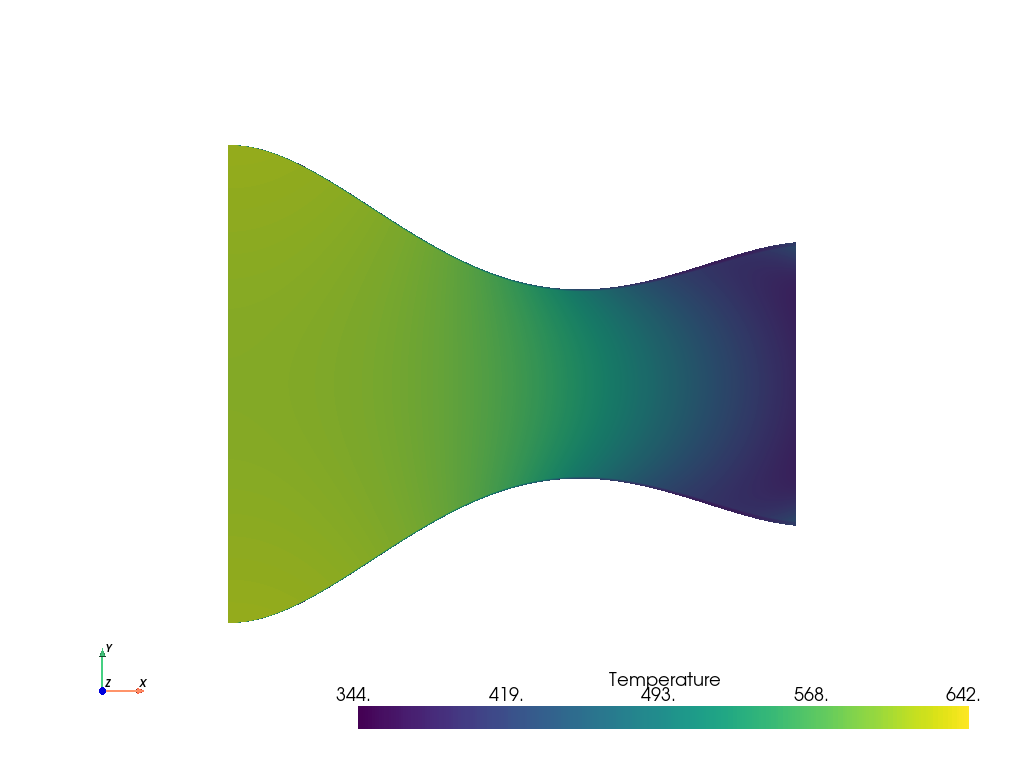

In [35]:
mesh['Zone 0 (Comp. Fluid)']['Internal']['Internal'].set_active_scalars('Temperature')
mesh['Zone 0 (Comp. Fluid)']['Internal']['Internal'].plot(cpos='xy')

/home/ppiper/micromamba/envs/explann/lib/python3.9/site-packages/pyvista/jupyter/notebook.py:58: UserWarning: Failed to use notebook backend: 

No module named 'trame'

Falling back to a static output.
  warnings.warn(


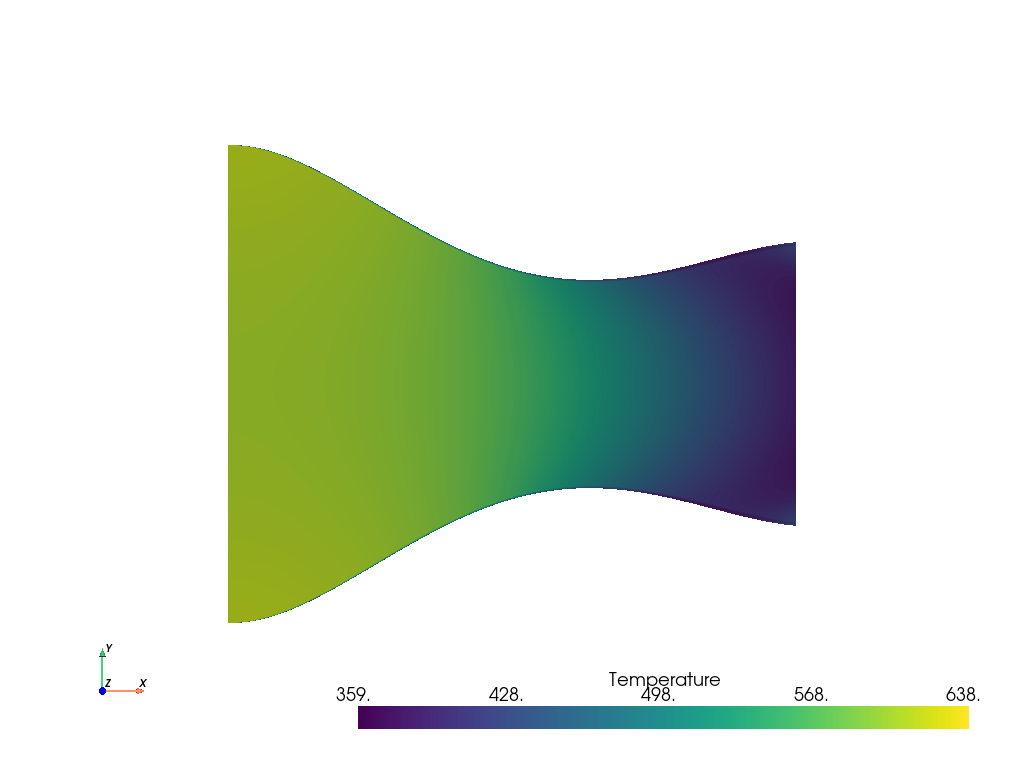

In [36]:
mesh_original['Zone 0 (Comp. Fluid)']['Internal']['Internal'].set_active_scalars('Temperature')
mesh_original['Zone 0 (Comp. Fluid)']['Internal']['Internal'].plot(cpos='xy')

In [37]:
mesh['Zone 0 (Comp. Fluid)']['Internal']['Internal']['Error'] = np.abs(
    mesh['Zone 0 (Comp. Fluid)']['Internal']['Internal']['Temperature']-
    mesh_original['Zone 0 (Comp. Fluid)']['Internal']['Internal']['Temperature'])

/home/ppiper/micromamba/envs/explann/lib/python3.9/site-packages/pyvista/jupyter/notebook.py:58: UserWarning: Failed to use notebook backend: 

No module named 'trame'

Falling back to a static output.
  warnings.warn(


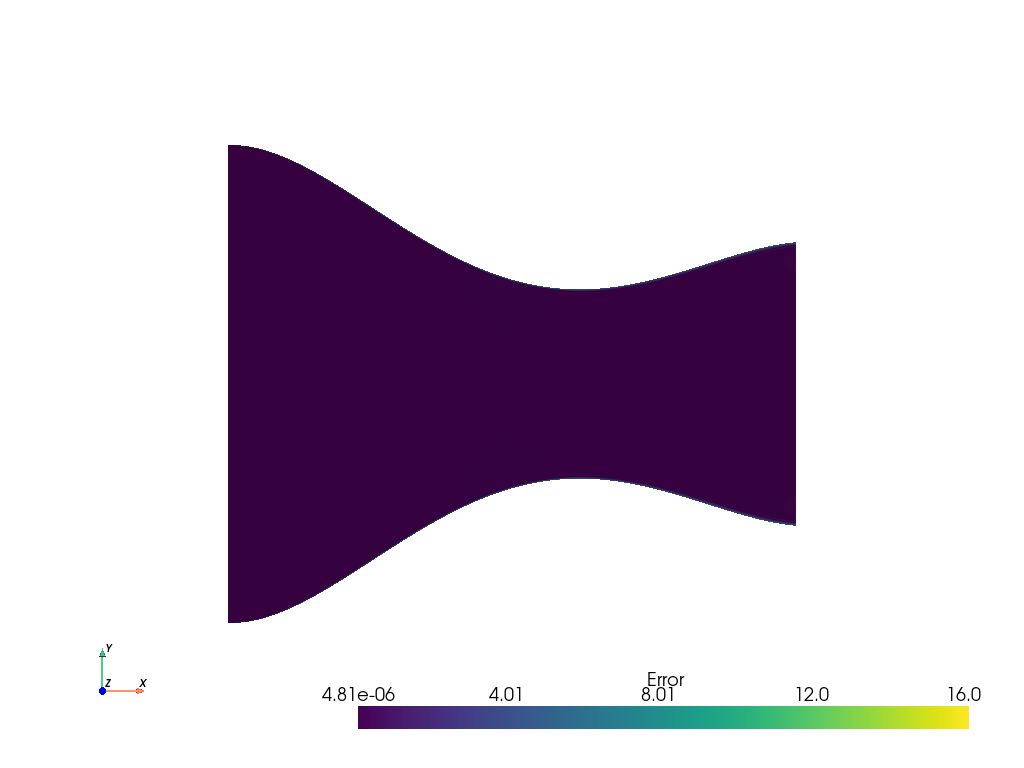

In [38]:
mesh['Zone 0 (Comp. Fluid)']['Internal']['Internal'].set_active_scalars('Error')
mesh['Zone 0 (Comp. Fluid)']['Internal']['Internal'].plot(cpos='xy')

In [101]:
ccd.levels

,t,c,T,p,T_e
Levels,,,,,
-2.378414,0.001000,-0.012558,400.000000,400000.000000,290.000000
-1.000000,0.003608,-0.008919,472.443974,573865.537712,321.875349
0.000000,0.005500,-0.006279,525.000000,700000.000000,345.000000
1.000000,0.007392,-0.003639,577.556026,826134.462288,368.124651
2.378414,0.010000,0.000000,650.000000,1000000.000000,400.000000


In [68]:
T_surrogate=surrogate(
    model=ffm,
    variables={
        't': 0.006044329228014826,
        'c': -0.001277584765410799,
        'T': 616.0,
        'p': 456429.13834591914,
        #'T_e': 318.0
    },
    svd=svd)

In [104]:
T_surrogate[46553]

494.7056527855523

In [103]:
def get_variable_at_position(variable, mesh, position):
    idx = mesh.find_closest_cell(position)
    print(idx)
    return mesh[variable][idx]

get_variable_at_position('Temperature', mesh[0][0][0], [0.1, 0.0, 0.0])

46553


494.7056527855523

In [97]:
dir(mesh[0][0][0])

['ALL_PIECES_EXTENT',
 'AddObserver',
 'AddReferenceToCell',
 'Allocate',
 'AllocateCellGhostArray',
 'AllocateEstimate',
 'AllocateExact',
 'AllocatePointGhostArray',
 'AttributeTypes',
 'BOUNDING_BOX',
 'BreakOnError',
 'BuildCellLocator',
 'BuildLinks',
 'BuildLocator',
 'BuildPointLocator',
 'CELL',
 'CELL_DATA_FIELD',
 'CELL_DATA_VECTOR',
 'CheckAttributes',
 'ComputeBounds',
 'ConvertFaceStreamPointIds',
 'CopyAttributes',
 'CopyInformationFromPipeline',
 'CopyInformationToPipeline',
 'CopyStructure',
 'Crop',
 'DATA_EXTENT',
 'DATA_EXTENT_TYPE',
 'DATA_NUMBER_OF_GHOST_LEVELS',
 'DATA_NUMBER_OF_PIECES',
 'DATA_OBJECT',
 'DATA_OBJECT_FIELD',
 'DATA_PIECE_NUMBER',
 'DATA_TIME_STEP',
 'DATA_TYPE_NAME',
 'DIRECTION',
 'DataHasBeenGenerated',
 'DebugOff',
 'DebugOn',
 'DecomposeAPolyhedronCell',
 'DeepCopy',
 'EDGE',
 'EDGE_DATA_VECTOR',
 'EditableOff',
 'EditableOn',
 'ExtendedNew',
 'FIELD',
 'FIELD_ACTIVE_ATTRIBUTE',
 'FIELD_ARRAY_TYPE',
 'FIELD_ASSOCIATION',
 'FIELD_ASSOCIATION_CE

/home/ppiper/micromamba/envs/explann/lib/python3.9/site-packages/pyvista/jupyter/notebook.py:58: UserWarning: Failed to use notebook backend: 

No module named 'trame'

Falling back to a static output.
  warnings.warn(


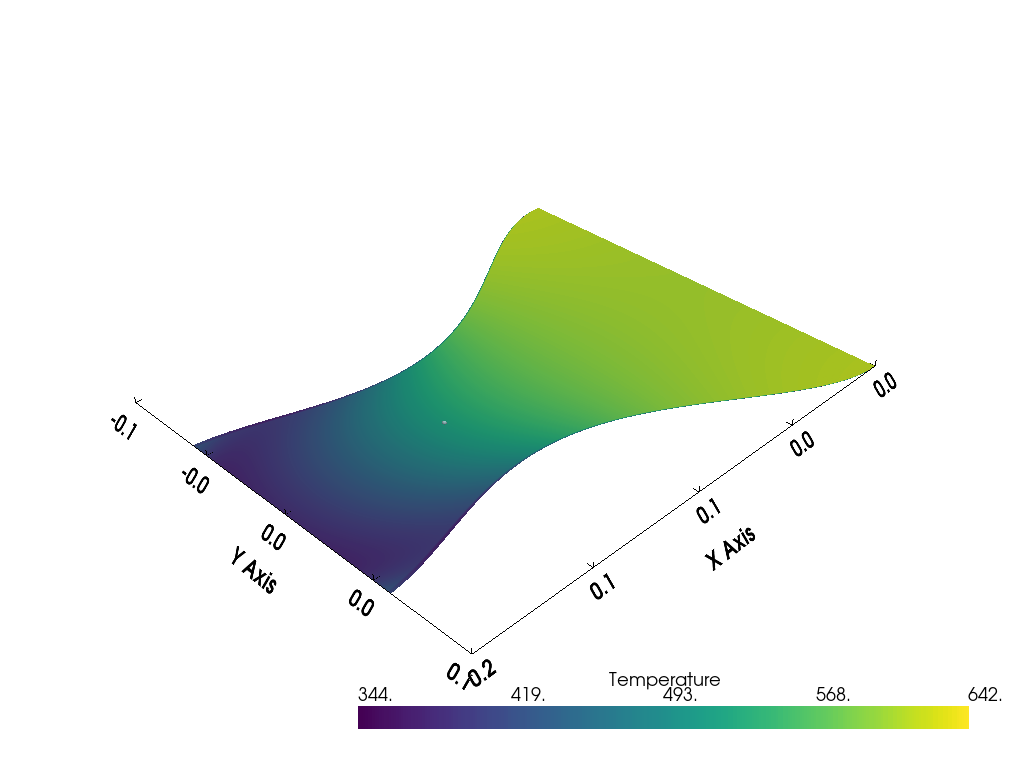

In [99]:
p = pv.Plotter()
p.add_mesh(mesh[0][0][0], scalars='Temperature')
#p.add_mesh(mesh[0][0][0]['Temperature'][164], color='red')
p.add_points(np.array([0.1,0,0]), render_points_as_spheres=True)
p.show_bounds()
p.show()